In [ ]:
# Complete code to retrain crop prediction model
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("CROP PREDICTION MODEL RETRAINING")
print("="*60)


CROP PREDICTION MODEL RETRAINING


In [ ]:
# Step 1: Load and examine the dataset
print("\n1. LOADING DATASET...")
try:
    # Try different possible file names/locations
    # Modify this path according to your dataset location
    df = pd.read_csv('/content/Crop_recommendation.csv')  # Change filename as needed
    print(f"Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Dataset file not found. Please upload your CSV file.")
    print("Common filenames: 'crop_recommendation.csv', 'dataset.csv', 'agriculture_data.csv'")
    # Create sample dataset for demonstration
    print("\nCreating sample dataset for demonstration...")

    np.random.seed(42)
    n_samples = 2000

    sample_data = {
        'N': np.random.randint(0, 150, n_samples),
        'P': np.random.randint(5, 145, n_samples),
        'K': np.random.randint(5, 205, n_samples),
        'temperature': np.random.uniform(8, 44, n_samples),
        'humidity': np.random.uniform(14, 100, n_samples),
        'ph': np.random.uniform(3.5, 10, n_samples),
        'rainfall': np.random.uniform(20, 300, n_samples),
        'label': np.random.choice(['rice', 'wheat', 'maize', 'cotton', 'jute', 'coffee', 'apple', 'orange'], n_samples)
    }
    df = pd.DataFrame(sample_data)
    print("Sample dataset created for demonstration purposes.")


1. LOADING DATASET...
Dataset loaded successfully!
Dataset shape: (2200, 8)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Step 2: Data exploration and preprocessing
print(f"\n2. DATA EXPLORATION...")
print(f"Dataset Info:")
print(df.info())
print(f"\nDataset Description:")
print(df.describe())
print(f"\nTarget Variable Distribution:")
print(df['label'].value_counts())

# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())




2. DATA EXPLORATION...
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Dataset Description:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     

In [ ]:
# Step 3: Feature engineering and preprocessing
print(f"\n3. FEATURE ENGINEERING...")

# Define features and target
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[feature_columns]
y = df['label']

print(f"Features: {feature_columns}")
print(f"Number of unique crops: {y.nunique()}")
print(f"Crops: {sorted(y.unique())}")

#Optional: Feature scaling (uncomment if needed)
 #scaler = StandardScaler()
 #X_scaled = scaler.fit_transform(X)
 #X = pd.DataFrame(X_scaled, columns=feature_columns)


3. FEATURE ENGINEERING...
Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Number of unique crops: 22
Crops: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [ ]:
# Step 4: Split the data
print(f"\n4. SPLITTING DATA...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")




4. SPLITTING DATA...
Training set size: 1760
Test set size: 440


In [ ]:
# Step 5: Model training with multiple algorithms
print(f"\n5. TRAINING MODELS...")

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

best_model = None
best_score = 0
best_name = ""
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean()

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_score': cv_mean,
        'predictions': y_pred
    }

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Score: {cv_mean:.4f} (+/- {cv_scores.std() * 2:.4f})")

    if cv_mean > best_score:
        best_score = cv_mean
        best_model = model
        best_name = name

print(f"\nBest Model: {best_name} with CV Score: {best_score:.4f}")


5. TRAINING MODELS...

Training Random Forest...
Test Accuracy: 0.9955
Cross-validation Score: 0.9932 (+/- 0.0085)

Training SVM...
Test Accuracy: 0.9841
Cross-validation Score: 0.9739 (+/- 0.0141)

Training Logistic Regression...
Test Accuracy: 0.9455
Cross-validation Score: 0.9676 (+/- 0.0146)

Best Model: Random Forest with CV Score: 0.9932


In [ ]:
# Step 6: Hyperparameter tuning for the best model (Random Forest)
print(f"\n6. HYPERPARAMETER TUNING...")

if best_name == 'Random Forest':
    print("Tuning Random Forest hyperparameters...")

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=3,  # Reduced for faster execution
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")




6. HYPERPARAMETER TUNING...
Tuning Random Forest hyperparameters...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9955



7. FINAL MODEL EVALUATION...
Final Model: Random Forest
Final Test Accuracy: 0.9932

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00   

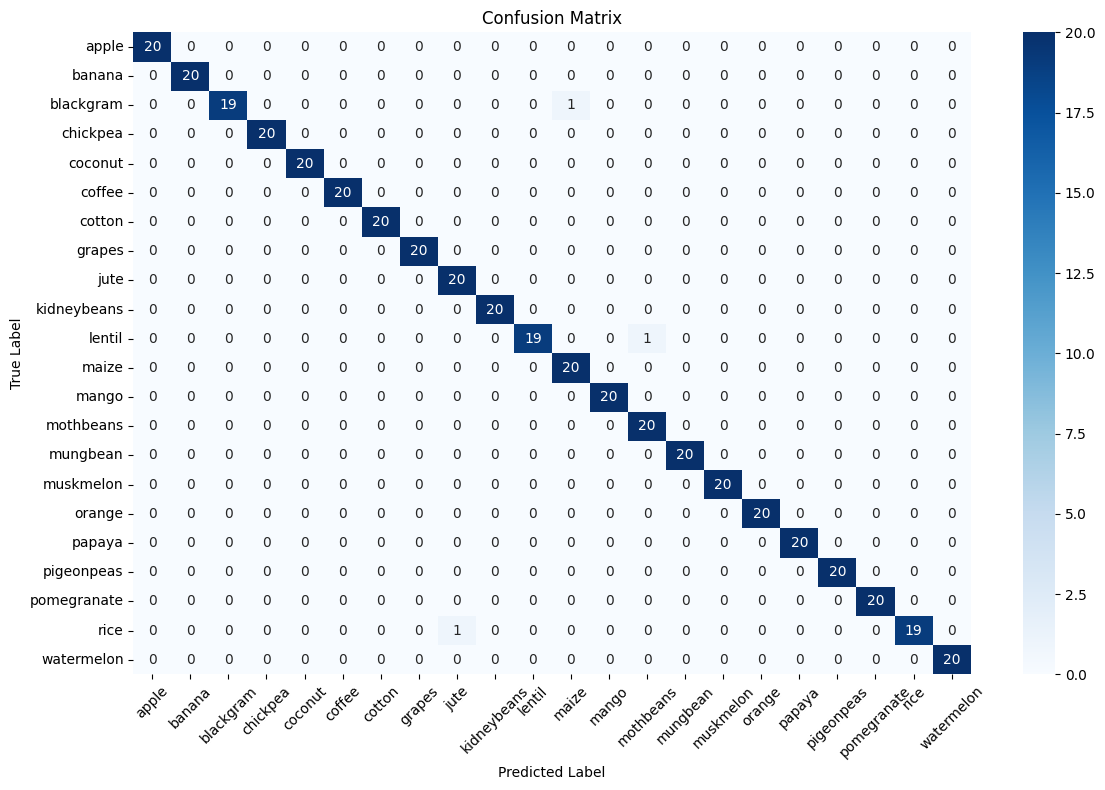


Feature Importance:
       feature  importance
4     humidity    0.217772
6     rainfall    0.214912
2            K    0.188702
1            P    0.150482
0            N    0.104447
3  temperature    0.073857
5           ph    0.049828


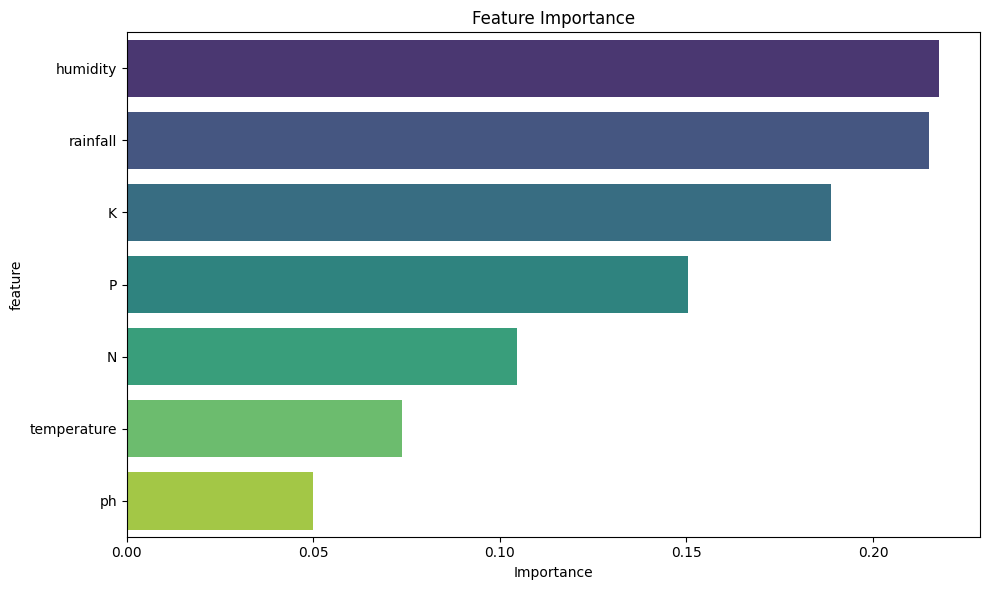

In [ ]:
# Step 7: Final model evaluation
print(f"\n7. FINAL MODEL EVALUATION...")

# Train final model on full training set
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Model: {best_name}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Detailed classification report
print(f"\nClassification Report:")
print(classification_report(y_test, final_predictions))

# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, final_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nFeature Importance:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


In [ ]:
# Step 8: Save the retrained model
print(f"\n8. SAVING MODEL...")

try:
    # Save the model
    with open('yield2_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print("Model saved as 'yield_model.pkl'")


    # Save model information
    model_info = {
        'model_type': best_name,
        'features': feature_columns,
        'classes': sorted(y.unique()),
        'accuracy': final_accuracy,
        'cv_score': best_score
    }

    with open('model_info.pkl', 'wb') as file:
        pickle.dump(model_info, file)
    print("Model information saved as 'model_info.pkl'")

except Exception as e:
    print(f"Error saving model: {e}")




8. SAVING MODEL...
Model saved as 'yield_model.pkl'
Model information saved as 'model_info.pkl'


In [ ]:
# Step 9: Test the saved model
print(f"\n9. TESTING SAVED MODEL...")

try:
    # Load and test the saved model
    with open('yield2_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    # Test with your original examples
    test_samples = pd.DataFrame({
        'N': [90, 85],
        'P': [42, 58],
        'K': [43, 41],
        'temperature': [20.87974371, 21.77046169],
        'humidity': [82.00274423, 80.31964408],
        'ph': [6.502985292, 7.038096361],
        'rainfall': [202.9355362, 226.6555374]
    })

    predictions = loaded_model.predict(test_samples)
    probabilities = loaded_model.predict_proba(test_samples)

    print("Test Predictions:")
    print(f"Sample 1: {predictions[0]} (confidence: {probabilities[0].max():.3f})")
    print(f"Sample 2: {predictions[1]} (confidence: {probabilities[1].max():.3f})")

except Exception as e:
    print(f"Error testing saved model: {e}")

print(f"\n" + "="*60)
print("MODEL RETRAINING COMPLETE!")
print("="*60)
print(f"✓ Best model: {best_name}")
print(f"✓ Final accuracy: {final_accuracy:.4f}")
print(f"✓ Model saved as: yield_model.pkl")
print(f"✓ Ready for deployment!")

# Usage instructions
print(f"\nUSAGE INSTRUCTIONS:")
print("1. The model is now saved as 'yield_model.pkl'")
print("2. Use the previous testing code snippet to make predictions")
print("3. Features required: N, P, K, temperature, humidity, ph, rainfall")
print("4. Model will predict crop types based on these soil and weather conditions")


9. TESTING SAVED MODEL...
Test Predictions:
Sample 1: rice (confidence: 0.908)
Sample 2: rice (confidence: 0.934)

MODEL RETRAINING COMPLETE!
✓ Best model: Random Forest
✓ Final accuracy: 0.9932
✓ Model saved as: yield_model.pkl
✓ Ready for deployment!

USAGE INSTRUCTIONS:
1. The model is now saved as 'yield_model.pkl'
2. Use the previous testing code snippet to make predictions
3. Features required: N, P, K, temperature, humidity, ph, rainfall
4. Model will predict crop types based on these soil and weather conditions
